C:\Users\KRISHNENDU\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.34754e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


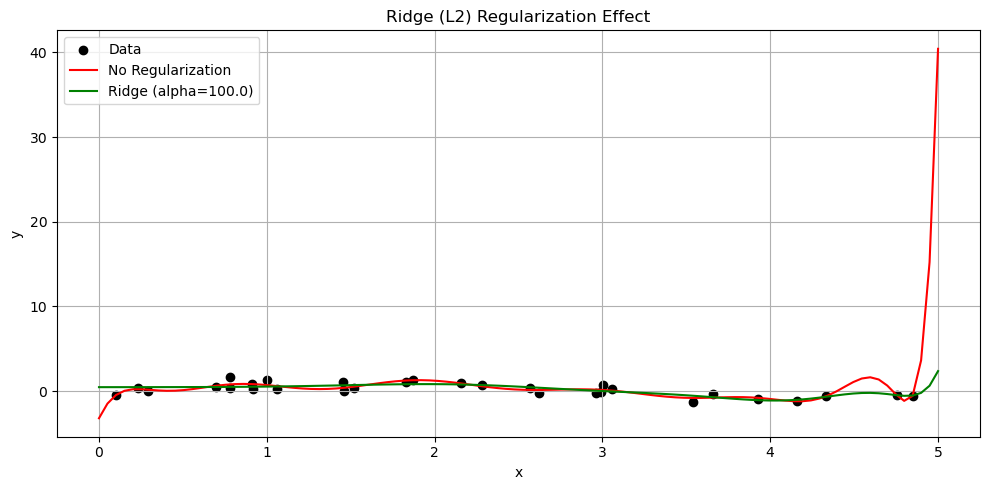

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate synthetic noisy data
np.random.seed(42)
n_samples = 30
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(n_samples) * 0.5  # true function + noise

# Polynomial degree
degree = 15

# No regularization (plain linear regression)
model_no_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_no_reg.fit(X, y)

# With Ridge regularization (L2)
alpha = 1e2  # Strength of regularization
model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
model_ridge.fit(X, y)

# Prediction grid
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred_no_reg = model_no_reg.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)

# Plot data and fits
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_test, y_pred_no_reg, color='red', label='No Regularization')
plt.plot(X_test, y_pred_ridge, color='green', label=f'Ridge (alpha={alpha})')
plt.title("Ridge (L2) Regularization Effect")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
